In [62]:
import requests
import json
import pandas as pd

url = "https://books.toscrape.com"

headers = {
    "User-Agent": "QuianaReearchBot/1.0"
}
response = requests.get(url, headers=headers)
html = response.content
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify()[:500])  # Print the first 500 characters of the prettified HTML



<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta conte


In [66]:
books = soup.find_all('article', class_='product_pod')
book_list = []
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    availability = book.find('p', class_='instock availability').text.strip()
    book_list.append({
        'Title': title,
        'Price': price,
        'Availability': availability
    })  
df = pd.DataFrame(book_list)
df

,Title,Price,Availability
0,A Light in the Attic,£51.77,In stock
1,Tipping the Velvet,£53.74,In stock
2,Soumission,£50.10,In stock
3,Sharp Objects,£47.82,In stock
4,Sapiens: A Brief History of Humankind,£54.23,In stock
5,The Requiem Red,£22.65,In stock
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock
9,The Black Maria,£52.15,In stock


In [2]:
import requests

url = "https://en.wikipedia.org/api/rest_v1/page/summary/web%20scrapping%20"

headers = {
    "User-Agent": "QuianaReearchBot/1.0"
}
response = requests.get(url, headers=headers)

data = response.json()
data

{'type': 'standard',
 'title': 'Web scraping',
 'displaytitle': '<span class="mw-page-title-main">Web scraping</span>',
 'namespace': {'id': 0, 'text': ''},
 'wikibase_item': 'Q665452',
 'titles': {'canonical': 'Web_scraping',
  'normalized': 'Web scraping',
  'display': '<span class="mw-page-title-main">Web scraping</span>'},
 'pageid': 2696619,
 'lang': 'en',
 'dir': 'ltr',
 'revision': '1314732027',
 'tid': '237cd778-9feb-11f0-8f64-232f643312b4',
 'timestamp': '2025-10-02T23:54:31Z',
 'description': 'Method of extracting data from websites',
 'description_source': 'local',
 'content_urls': {'desktop': {'page': 'https://en.wikipedia.org/wiki/Web_scraping',
   'revisions': 'https://en.wikipedia.org/wiki/Web_scraping?action=history',
   'edit': 'https://en.wikipedia.org/wiki/Web_scraping?action=edit',
   'talk': 'https://en.wikipedia.org/wiki/Talk:Web_scraping'},
  'mobile': {'page': 'https://en.wikipedia.org/wiki/Web_scraping',
   'revisions': 'https://en.wikipedia.org/wiki/Special:Hi

In [3]:
data["extract"]

'Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.'

In [33]:
import json
import requests


S = requests.Session()

URL = "https://en.wikipedia.org/w/api.php"
headers = {
    "User-Agent": "QuianaReearchBot/1.0"
}


PARAMS = {
    "action": "query",
    "prop": "revisions",
    "titles": "homeless veterans in the United States",
    "rvprop": "timestamp|user|comment|content",
    "rvslots": "main",
    "rvlimit": 5,
    "formatversion": "2",
    "format": "json"
}

R = S.get(url=URL, params=PARAMS, headers=headers)


In [34]:
R.json()

{'continue': {'rvcontinue': '20250710031535|1299735135', 'continue': '||'},
 'query': {'normalized': [{'fromencoded': False,
    'from': 'homeless veterans in the United States',
    'to': 'Homeless veterans in the United States'}],
  'pages': [{'pageid': 44538994,
    'ns': 0,
    'title': 'Homeless veterans in the United States',
    'revisions': [{'user': '2405:9800:B660:E102:C83C:BF36:54BB:FEC4',
      'anon': True,
      'timestamp': '2025-09-16T14:48:07Z',
      'slots': {'main': {'contentmodel': 'wikitext',
        'contentformat': 'text/x-wiki',
        'content': '{{short description|none}}\n\'\'\'Homeless veterans\'\'\' are [[Veterans|persons who have served in the armed forces]] who are [[Homelessness in the United States|homeless]] or living without access to secure and appropriate accommodation.<ref>{{Cite web|url=http://www.benefits.va.gov/persona/veteran-homeless.asp|title=Homeless Veterans - Veterans|last=Service|first=Department of Veterans Affairs, Veterans Benefits A

In [56]:
import json
import pandas as pd

# Your ACTUAL Wikipedia API response - paste your full data here
wiki_data = {'continue': {'rvcontinue': '20250710031535|1299735135', 'continue': '||'},
 'query': {'normalized': [{'fromencoded': False,
    'from': 'homeless veterans in the United States',
    'to': 'Homeless veterans in the United States'}],
  'pages': [{'pageid': 44538994,
    'ns': 0,
    'title': 'Homeless veterans in the United States',
    'revisions': [{'user': '2405:9800:B660:E102:C83C:BF36:54BB:FEC4',
      'anon': True,
      'timestamp': '2025-09-16T14:48:07Z',
      'slots': {'main': {'contentmodel': 'wikitext',
        'contentformat': 'text/x-wiki',
        'content': '{{short description|none}}...'}},  # Shortened for brevity
      'comment': '/* Florida */ I added an example...'},
     {'user': 'Schazjmd',
      'timestamp': '2025-07-10T13:58:03Z',
      'slots': {'main': {'contentmodel': 'wikitext',
        'contentformat': 'text/x-wiki',
        'content': '{{short description|none}}...'}},
      'comment': 'Restored revision...'},
     {'user': 'Rodw',
      'timestamp': '2025-07-10T08:01:54Z',
      'slots': {'main': {'contentmodel': 'wikitext',
        'contentformat': 'text/x-wiki',
        'content': '{{Short description|Homeless Veterans in the U.S}}...'}},
      'comment': ''}
    ]}]}}

# Extract the page revisions
page = wiki_data['query']['pages'][0]
revisions = page['revisions']

# Create list to store revision data
revision_data = []

for rev in revisions:
    revision_data.append({
        'page_id': page['pageid'],
        'page_title': page['title'],
        'user': rev.get('user', 'Unknown'),
        'is_anonymous': rev.get('anon', False),
        'timestamp': rev['timestamp'],
        'comment': rev.get('comment', ''),
        'content_length': len(rev['slots']['main']['content']),
        'content_model': rev['slots']['main']['contentmodel'],
        'content_format': rev['slots']['main']['contentformat']
    })

# Create DataFrame
df = pd.DataFrame(revision_data)

# Display
print(f"Scraped {len(df)} revisions")
print(df.head())

# Show column names
print("\nColumn names:")
print(df.columns.tolist())

# Save to CSV
df.to_csv('wikipedia_revisions.csv', index=False)
print("\nData saved to wikipedia_revisions.csv")

Scraped 3 revisions
    page_id                              page_title  \
0  44538994  Homeless veterans in the United States   
1  44538994  Homeless veterans in the United States   
2  44538994  Homeless veterans in the United States   

                                      user  is_anonymous  \
0  2405:9800:B660:E102:C83C:BF36:54BB:FEC4          True   
1                                 Schazjmd         False   
2                                     Rodw         False   

              timestamp                              comment  content_length  \
0  2025-09-16T14:48:07Z  /* Florida */ I added an example...              29   
1  2025-07-10T13:58:03Z                 Restored revision...              29   
2  2025-07-10T08:01:54Z                                                   53   

  content_model content_format  
0      wikitext    text/x-wiki  
1      wikitext    text/x-wiki  
2      wikitext    text/x-wiki  

Column names:
['page_id', 'page_title', 'user', 'is_anonymous', 

Dataset contains 3 revisions
Date range: 2025-07-10 08:01:54+00:00 to 2025-09-16 14:48:07+00:00


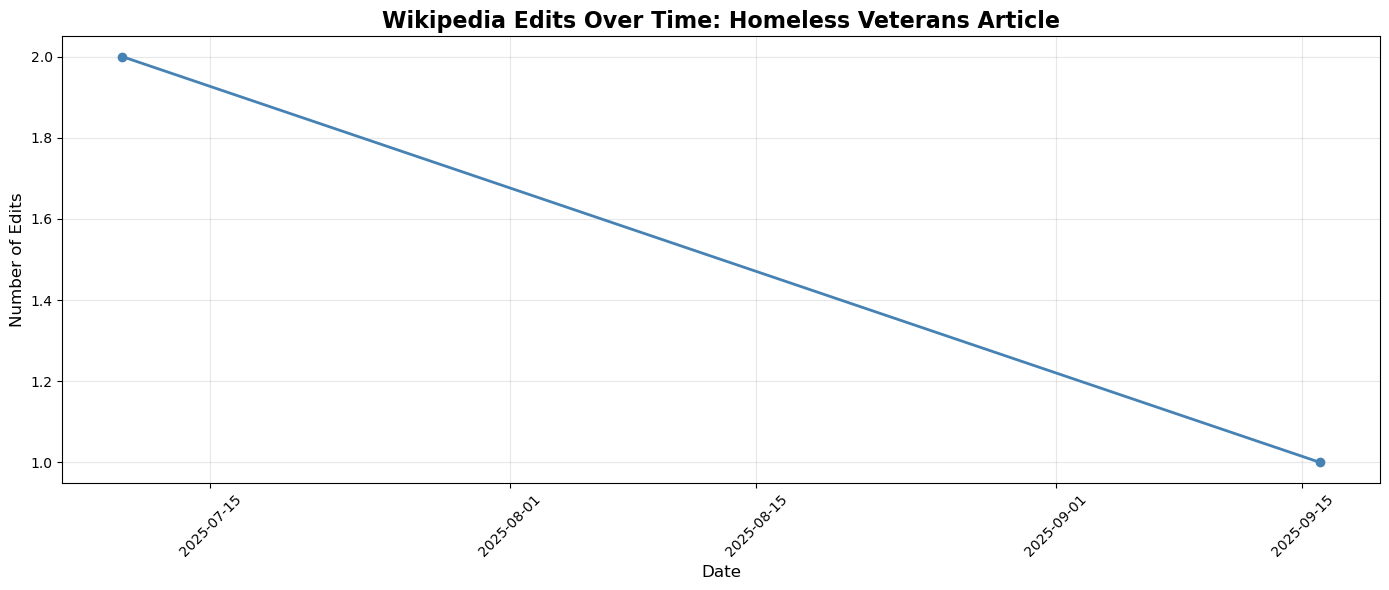

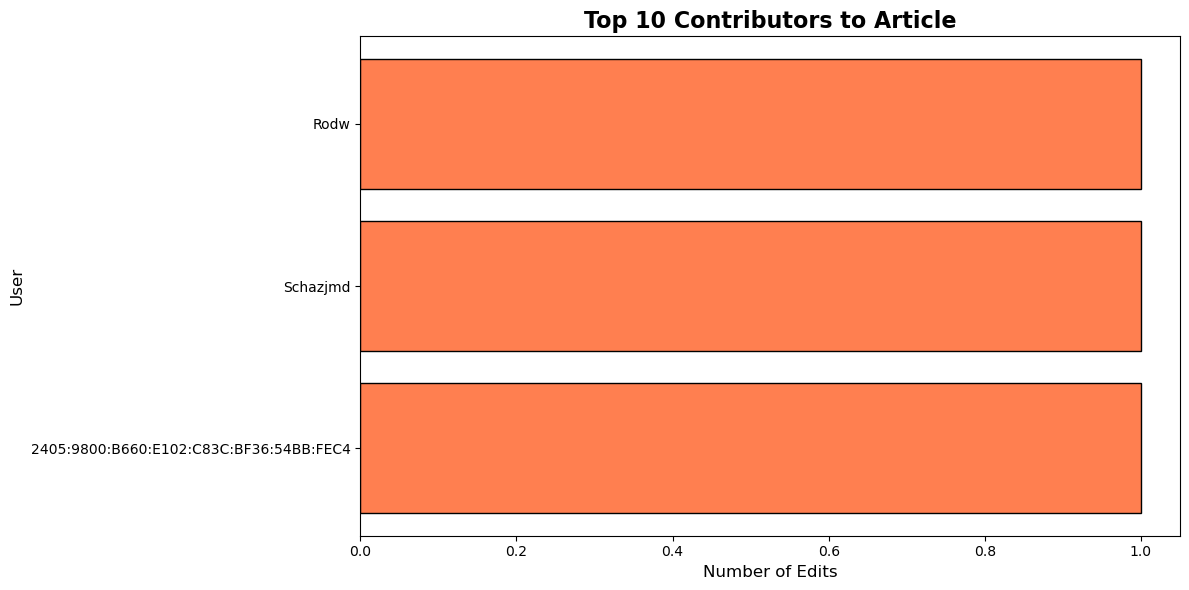

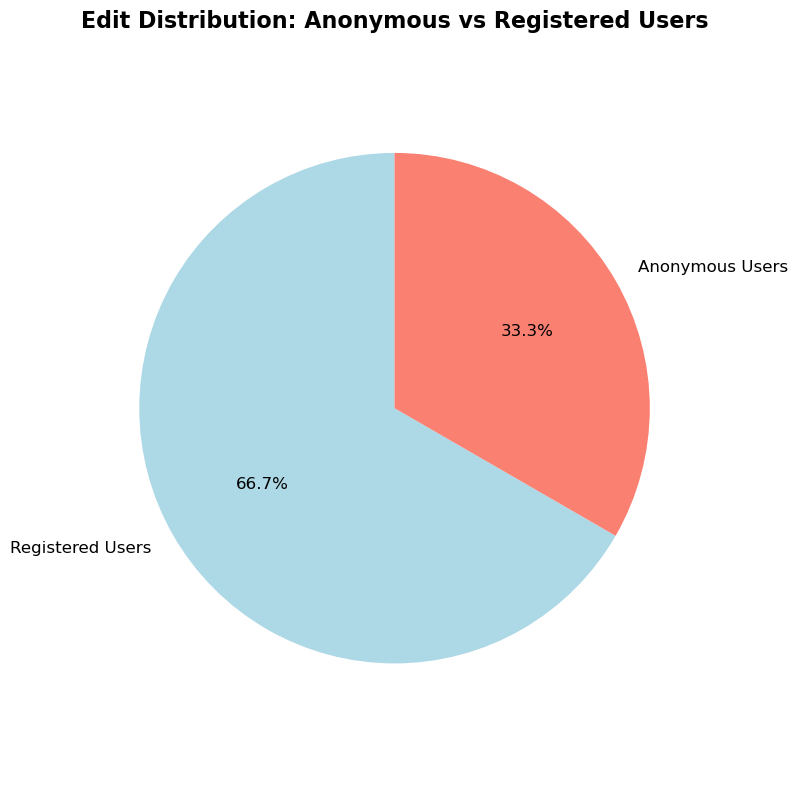

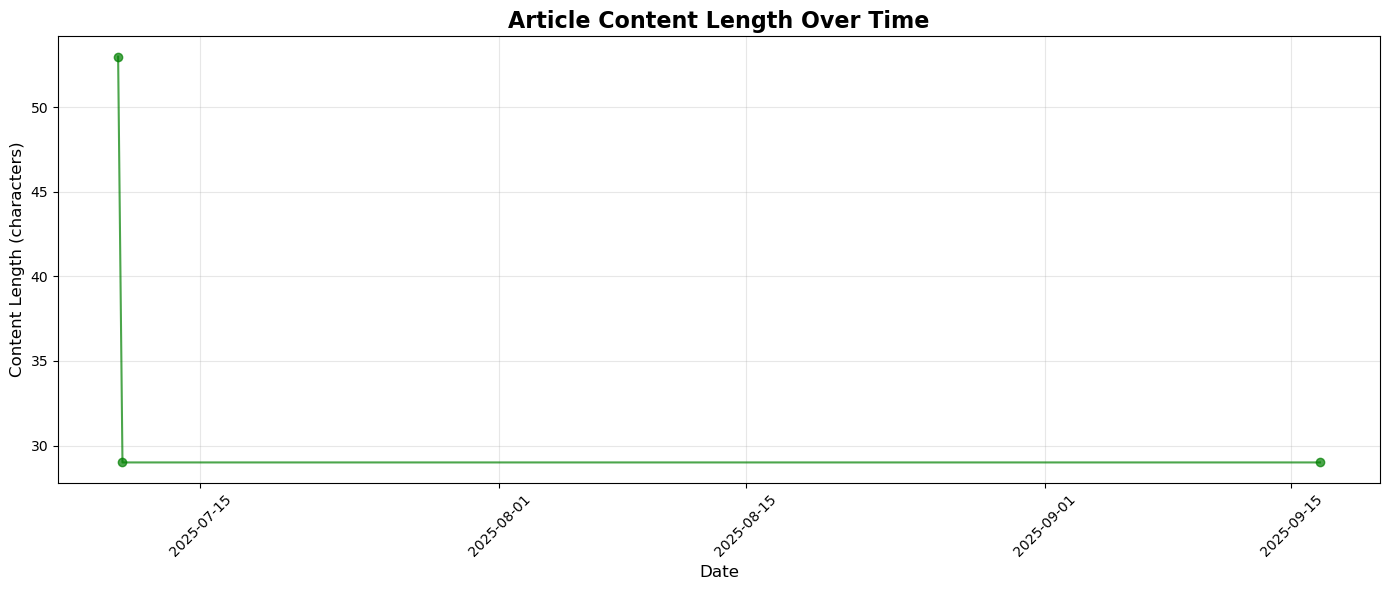

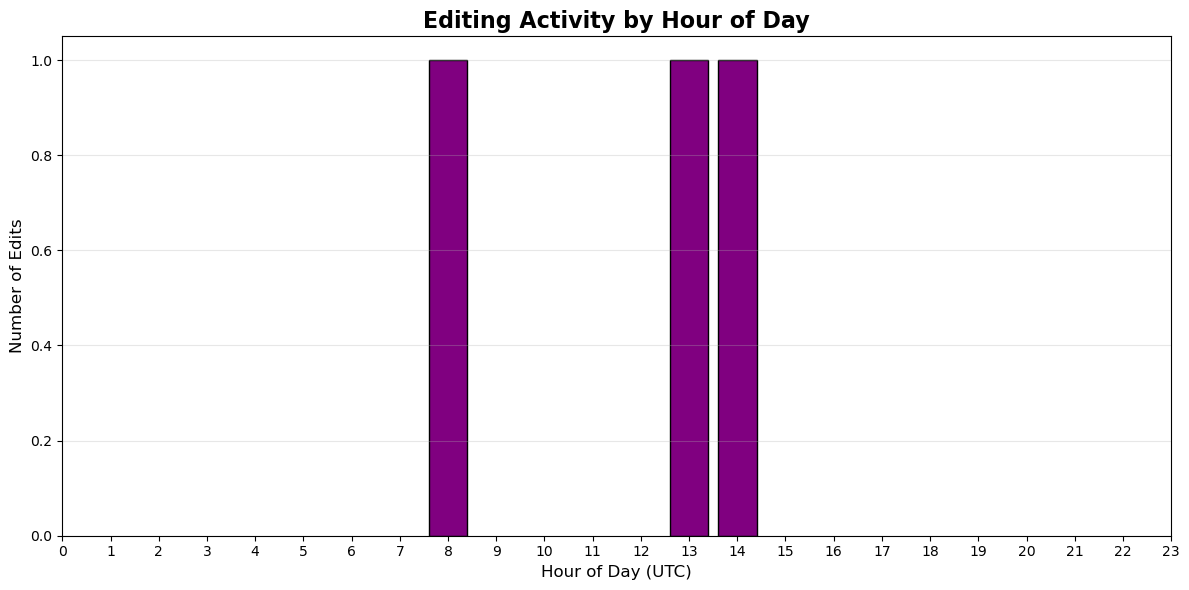

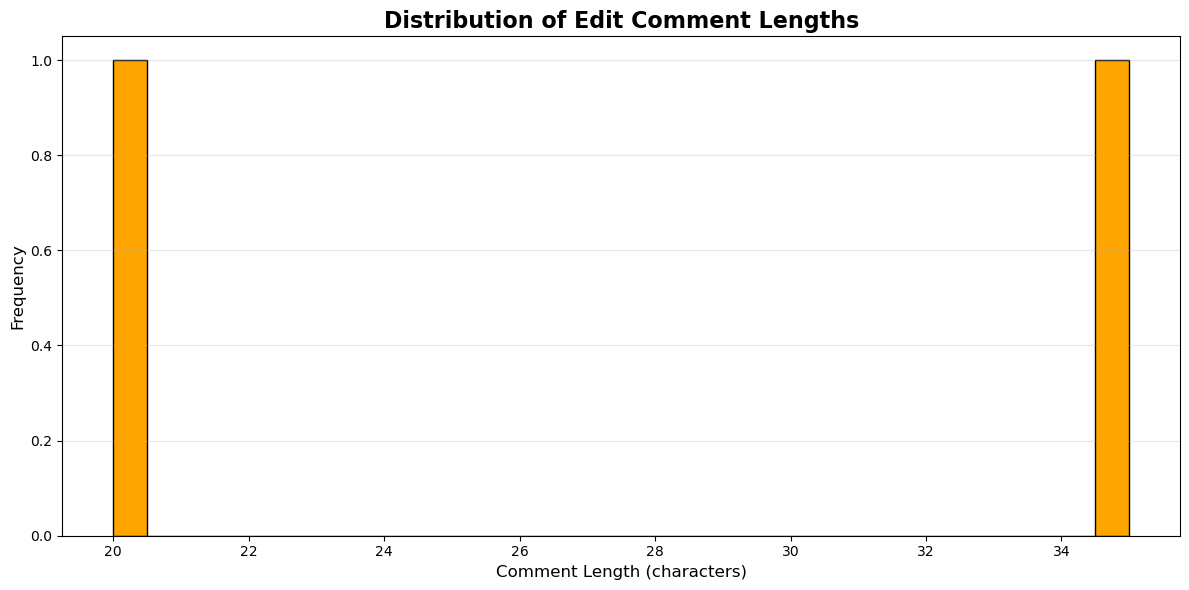


SUMMARY STATISTICS
Total revisions: 3
Unique contributors: 3
Anonymous edits: 1
Registered user edits: 2
Average content length: 37 characters
Most active contributor: 2405:9800:B660:E102:C83C:BF36:54BB:FEC4 (1 edits)
Date range: 2025-07-10 to 2025-09-16


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('wikipedia_revisions.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

print(f"Dataset contains {len(df)} revisions")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")

# ========== GRAPH 1: Edits Over Time ==========
plt.figure(figsize=(14, 6))
edits_per_day = df.groupby('date').size()
plt.plot(edits_per_day.index, edits_per_day.values, marker='o', linewidth=2, markersize=6, color='steelblue')
plt.title('Wikipedia Edits Over Time: Homeless Veterans Article', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Edits', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRAPH 2: Top Contributors ==========
plt.figure(figsize=(12, 6))
top_users = df['user'].value_counts().head(10)
plt.barh(top_users.index, top_users.values, color='coral', edgecolor='black')
plt.title('Top 10 Contributors to Article', fontsize=16, fontweight='bold')
plt.xlabel('Number of Edits', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.tight_layout()
plt.show()

# ========== GRAPH 3: Anonymous vs Registered Users ==========
plt.figure(figsize=(8, 8))
user_type_counts = df['is_anonymous'].value_counts()
labels = ['Registered Users', 'Anonymous Users']
colors = ['lightblue', 'salmon']
plt.pie(user_type_counts, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Edit Distribution: Anonymous vs Registered Users', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# ========== GRAPH 4: Content Length Changes Over Time ==========
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values('timestamp')
plt.plot(df_sorted['timestamp'], df_sorted['content_length'], 
         marker='o', linestyle='-', color='green', alpha=0.7)
plt.title('Article Content Length Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Content Length (characters)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRAPH 5: Editing Activity by Hour of Day ==========
plt.figure(figsize=(12, 6))
edits_by_hour = df['hour'].value_counts().sort_index()
plt.bar(edits_by_hour.index, edits_by_hour.values, color='purple', edgecolor='black')
plt.title('Editing Activity by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (UTC)', fontsize=12)
plt.ylabel('Number of Edits', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRAPH 6: Edit Comment Word Cloud (if comments exist) ==========
if df['comment'].str.len().sum() > 0:
    # Show distribution of edit comment lengths
    plt.figure(figsize=(12, 6))
    comment_lengths = df['comment'].str.len()
    plt.hist(comment_lengths, bins=30, color='orange', edgecolor='black')
    plt.title('Distribution of Edit Comment Lengths', fontsize=16, fontweight='bold')
    plt.xlabel('Comment Length (characters)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ========== Summary Statistics ==========
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total revisions: {len(df)}")
print(f"Unique contributors: {df['user'].nunique()}")
print(f"Anonymous edits: {df['is_anonymous'].sum()}")
print(f"Registered user edits: {(~df['is_anonymous']).sum()}")
print(f"Average content length: {df['content_length'].mean():.0f} characters")
print(f"Most active contributor: {df['user'].value_counts().index[0]} ({df['user'].value_counts().values[0]} edits)")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

In [ ]:
from bs4 import BeautifulSoup

In [35]:
headers = {
    "User-Agent": "QuianaReearchBot/1.0"
}
url = "https://ilga.gov/senate/members/"

response = requests.get(url, headers=headers)   
html = response.text
print(html[:500])  # Print the first 500 characters of the HTML

<!DOCTYPE html>
<html lang="en">
<head id="Head1">
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta http-equiv="content-type" content="text/html;charset=utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
    <meta charset="utf-8" />
    <meta charset="UTF-8">
    <!-- Meta Description -->
    <meta name="description" content="Welcome to the official government website of the Illinois General Assembly">
    <meta name="contactName


In [36]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify()[:500])  # Print the first 500 characters of the prettified HTML

<!DOCTYPE html>
<html lang="en">
 <head id="Head1">
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta charset="utf-8"/>
  <!-- Meta Description -->
  <meta content="Welcome to the official government website of the Illinois General Assembly" name="description"/>
  <meta content="Legislative Information System" nam


In [40]:
soup.find_all("a")


[<a b-0yw6sxot5c="" class="dropdown-item" data-lang="en" href="#">
 <span b-0yw6sxot5c="" class="flag-icon flag-icon-us"></span> English
                             </a>,
 <a b-0yw6sxot5c="" class="dropdown-item" data-lang="af" href="#">
 <span b-0yw6sxot5c="" class="flag-icon flag-icon-za"></span> Afrikaans
                             </a>,
 <a b-0yw6sxot5c="" class="dropdown-item" data-lang="sq" href="#">
 <span b-0yw6sxot5c="" class="flag-icon flag-icon-al"></span> Albanian
                             </a>,
 <a b-0yw6sxot5c="" class="dropdown-item" data-lang="ar" href="#">
 <span b-0yw6sxot5c="" class="flag-icon flag-icon-ae"></span> Arabic
                             </a>,
 <a b-0yw6sxot5c="" class="dropdown-item" data-lang="hy" href="#">
 <span b-0yw6sxot5c="" class="flag-icon flag-icon-am"></span> Armenian
                             </a>,
 <a b-0yw6sxot5c="" class="dropdown-item" data-lang="az" href="#">
 <span b-0yw6sxot5c="" class="flag-icon flag-icon-az"></span> Azerbaij

In [41]:
a_tags = soup.find_all("a")
len(a_tags)

272

In [46]:
soup.find_all("a", class_="member-name")


[]

In [48]:
for a in soup.find_all("a", class_="notranslate"):
    print(a.text.strip())

Neil Anderson
Neil Anderson
Omar Aquino
Omar Aquino
Li Arellano, Jr.
Li Arellano, Jr.
Chris Balkema
Chris Balkema
Christopher Belt
Christopher Belt
Terri Bryant
Terri Bryant
Cristina Castro
Cristina Castro
Javier L. Cervantes
Javier L. Cervantes
Andrew S. Chesney
Andrew S. Chesney
Lakesia Collins
Lakesia Collins
Bill Cunningham
Bill Cunningham
John F. Curran
John F. Curran
Donald P. DeWitte
Donald P. DeWitte
Mary Edly-Allen
Mary Edly-Allen
Laura Ellman
Laura Ellman
Paul Faraci
Paul Faraci
Sara Feigenholtz
Sara Feigenholtz
Laura Fine
Laura Fine
Dale Fowler
Dale Fowler
Suzy Glowiak Hilton
Suzy Glowiak Hilton
Graciela Guzmán
Graciela Guzmán
Michael W. Halpin
Michael W. Halpin
Don Harmon
Don Harmon
Napoleon Harris, III
Napoleon Harris, III
Erica Harriss
Erica Harriss
Michael E. Hastings
Michael E. Hastings
Darby A. Hills
Darby A. Hills
Linda Holmes
Linda Holmes
Mattie Hunter
Mattie Hunter
Adriane Johnson
Adriane Johnson
Emil Jones, III
Emil Jones, III
Patrick J. Joyce
Patrick J. Joyce
Davi

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape a single page
def scrape_quotes_page(page_num):
    url = f"https://quotes.toscrape.com/page/{page_num}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    quotes_data = []
    
    # Find all quote containers
    quotes = soup.find_all('div', class_='quote')
    
    for quote in quotes:
        text = quote.find('span', class_='text').text
        author = quote.find('small', class_='author').text
        tags = [tag.text for tag in quote.find_all('a', class_='tag')]
        
        quotes_data.append({
            'quote': text,
            'author': author,
            'tags': ', '.join(tags)
        })
    
    return quotes_data

# Scrape all pages (there are 10 pages)
all_quotes = []
for page in range(1, 11):
    print(f"Scraping page {page}...")
    quotes = scrape_quotes_page(page)
    all_quotes.extend(quotes)
    
# Convert to DataFrame
df = pd.DataFrame(all_quotes)

# Display results
print(f"\nScraped {len(df)} quotes!")
print(df.head())

# Save to CSV
df.to_csv('quotes.csv', index=False)
print("\nSaved to quotes.csv")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...

Scraped 100 quotes!
                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  

Saved to quotes.csv


In [51]:
!pip install selenium beautifulsoup4 pandas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set up Chrome driver
driver = webdriver.Chrome()

# Navigate to weather.com (you'll need to specify a location)
url = "https://weather.com/weather/today/l/USCA0987:1:US"  # Example: San Francisco
driver.get(url)

# Wait for page to load
time.sleep(5)

# Get page source after JavaScript loads
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract temperature (you'll need to inspect the page to find correct classes)
try:
    temp = driver.find_element(By.CLASS_NAME, "CurrentConditions--tempValue--MHmYY").text
    condition = driver.find_element(By.CLASS_NAME, "CurrentConditions--phraseValue--mZC_p").text
    
    print(f"Temperature: {temp}")
    print(f"Conditions: {condition}")
    
except Exception as e:
    print(f"Error: {e}")

driver.quit()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 49.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2━━━━━━━━━━━ 2/8 [typing_extensions]
  Attempting uninstall: certifi0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/8 [typing_extensions]
    Found existing installation: certifi 2025.4.26━━━━━━━━━━━━ 2/8 [typing_extensions]
    Uninstalling certifi-2025.4.26:━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/8 [typing_extensions]
      Successfully uninstalled certifi-2025.4.26━━━━━━━━━━━━━━ 2/8 [typing_extensions]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [selenium]7/8 [selenium]ions]
Error: Message: no such element: Unable to locate element: {"method":"css selector","selector":".C

Scraped 100 quotes!
                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           tags  quote_length  
0        change, deep-thoughts, thinking, world           115  
1                            abilities, choices            85  
2  inspirational, life, live, miracle, miracles           131  
3              aliteracy, books, classic, humor           104  
4                    be-yourself, inspirational           111  


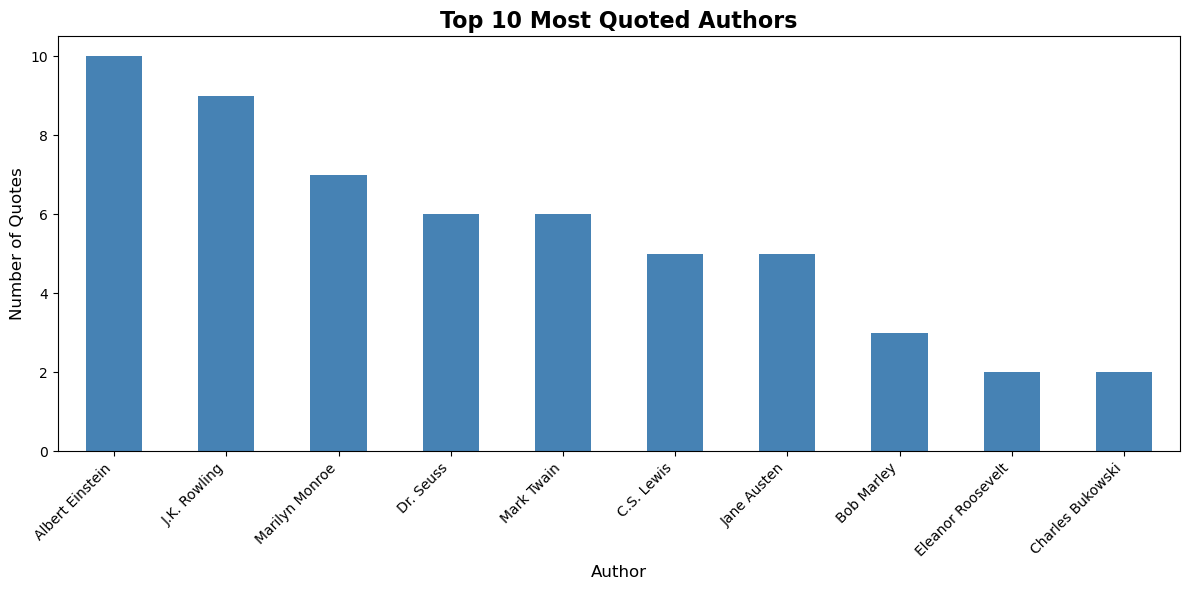

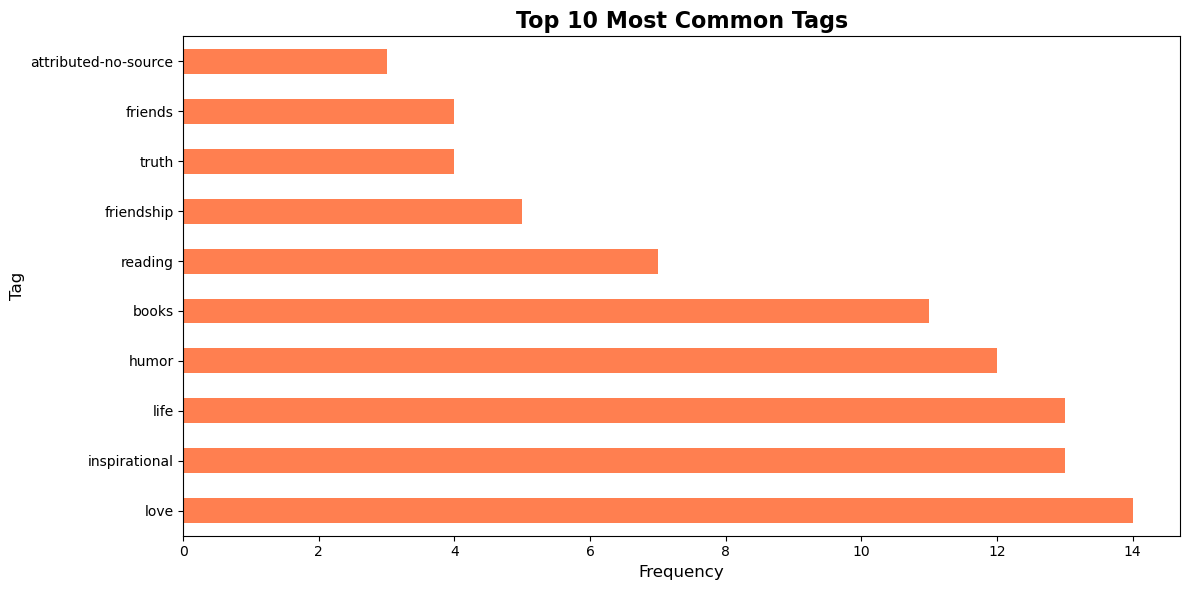

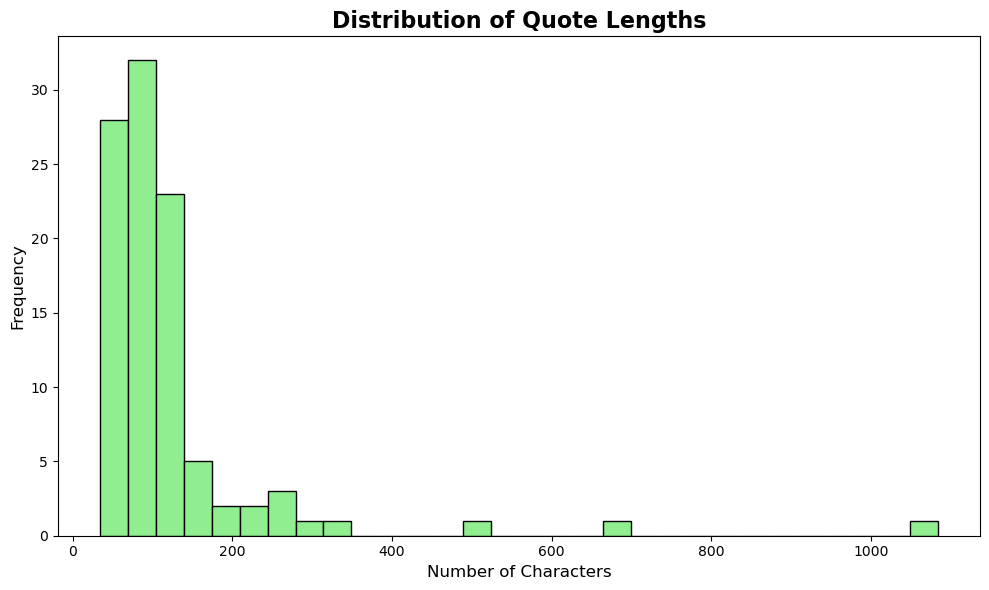

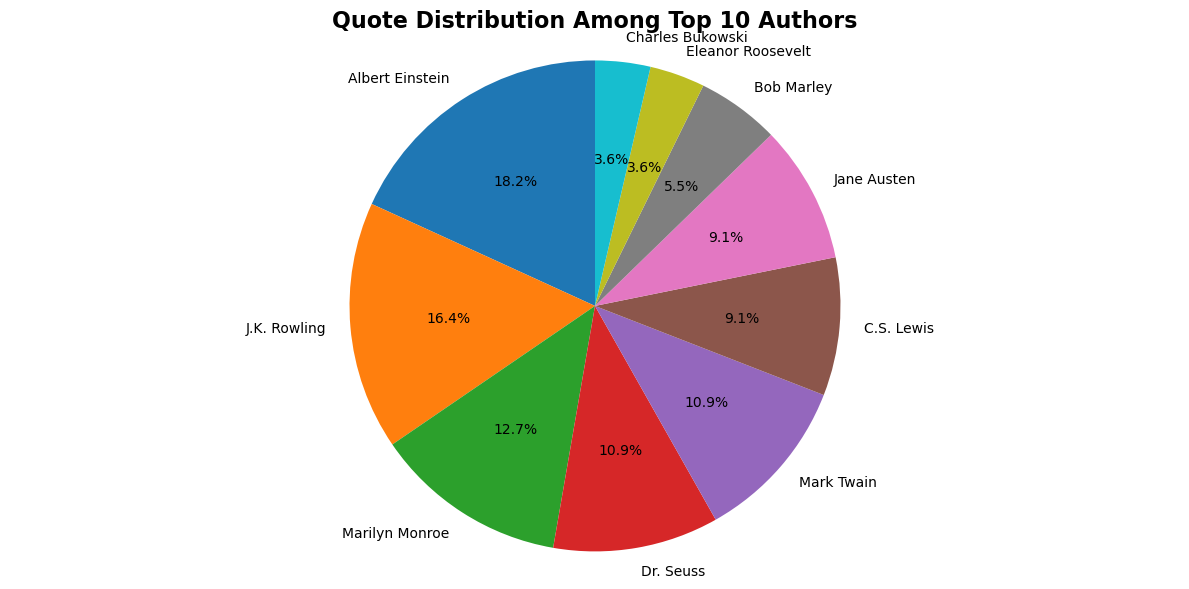


Data saved to quotes_data.csv


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Scrape quotes data
def scrape_all_quotes():
    all_quotes = []
    
    for page in range(1, 11):  # 10 pages
        url = f"https://quotes.toscrape.com/page/{page}/"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        quotes = soup.find_all('div', class_='quote')
        
        for quote in quotes:
            text = quote.find('span', class_='text').text
            author = quote.find('small', class_='author').text
            tags = [tag.text for tag in quote.find_all('a', class_='tag')]
            
            all_quotes.append({
                'quote': text,
                'author': author,
                'tags': ', '.join(tags),
                'quote_length': len(text)
            })
    
    return pd.DataFrame(all_quotes)

# Scrape the data
df = scrape_all_quotes()
print(f"Scraped {len(df)} quotes!")
print(df.head())

# GRAPH 1: Top 10 Most Quoted Authors
author_counts = df['author'].value_counts().head(10)

plt.figure(figsize=(12, 6))
author_counts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Quoted Authors', fontsize=16, fontweight='bold')
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Quotes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# GRAPH 2: Most Common Tags
all_tags = df['tags'].str.split(', ').explode()
tag_counts = all_tags.value_counts().head(10)

plt.figure(figsize=(12, 6))
tag_counts.plot(kind='barh', color='coral')
plt.title('Top 10 Most Common Tags', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Tag', fontsize=12)
plt.tight_layout()
plt.show()

# GRAPH 3: Distribution of Quote Lengths
plt.figure(figsize=(10, 6))
plt.hist(df['quote_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Quote Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# GRAPH 4: Quotes per Author (Top 10)
plt.figure(figsize=(12, 6))
top_authors = df['author'].value_counts().head(10)
plt.pie(top_authors, labels=top_authors.index, autopct='%1.1f%%', startangle=90)
plt.title('Quote Distribution Among Top 10 Authors', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Save data
df.to_csv('quotes_data.csv', index=False)
print("\nData saved to quotes_data.csv")

In [53]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Major US cities with their lat/lon coordinates
cities = {
    'San Francisco': (37.7749, -122.4194),
    'New York': (40.7128, -74.0060),
    'Chicago': (41.8781, -87.6298),
    'Miami': (25.7617, -80.1918),
    'Seattle': (47.6062, -122.3321),
    'Denver': (39.7392, -104.9903),
    'Phoenix': (33.4484, -112.0740),
    'Boston': (42.3601, -71.0589)
}

# Function to get weather forecast
def get_weather_forecast(city_name, lat, lon):
    try:
        # Get grid point
        points_url = f"https://api.weather.gov/points/{lat},{lon}"
        response = requests.get(points_url, headers={'User-Agent': 'Weather Study (student project)'})
        data = response.json()
        
        # Get forecast
        forecast_url = data['properties']['forecast']
        forecast_response = requests.get(forecast_url, headers={'User-Agent': 'Weather Study (student project)'})
        forecast_data = forecast_response.json()
        
        return forecast_data['properties']['periods']
    except Exception as e:
        print(f"Error getting weather for {city_name}: {e}")
        return None

# Collect weather data
weather_data = []

for city, (lat, lon) in cities.items():
    print(f"Getting weather for {city}...")
    forecast = get_weather_forecast(city, lat, lon)
    
    if forecast:
        # Get current conditions (first period)

_IncompleteInputError: incomplete input (2605712376.py, line 44)

Getting weather for San Francisco...
Getting weather for New York...
Getting weather for Chicago...
Getting weather for Miami...
Getting weather for Seattle...
Getting weather for Denver...
Getting weather for Phoenix...
Getting weather for Boston...

Weather Data:
            City  Temperature                        Conditions    Wind Speed  \
0  San Francisco           56                             Clear         3 mph   
1       New York           61                      Partly Sunny        21 mph   
2        Chicago           65                             Sunny        20 mph   
3          Miami           85  Chance Showers And Thunderstorms        10 mph   
4        Seattle           59                 Chance Light Rain         7 mph   
5         Denver           62                             Sunny  13 to 26 mph   
6        Phoenix           88                             Sunny         0 mph   
7         Boston           67                        Patchy Fog  10 to 15 mph   

    

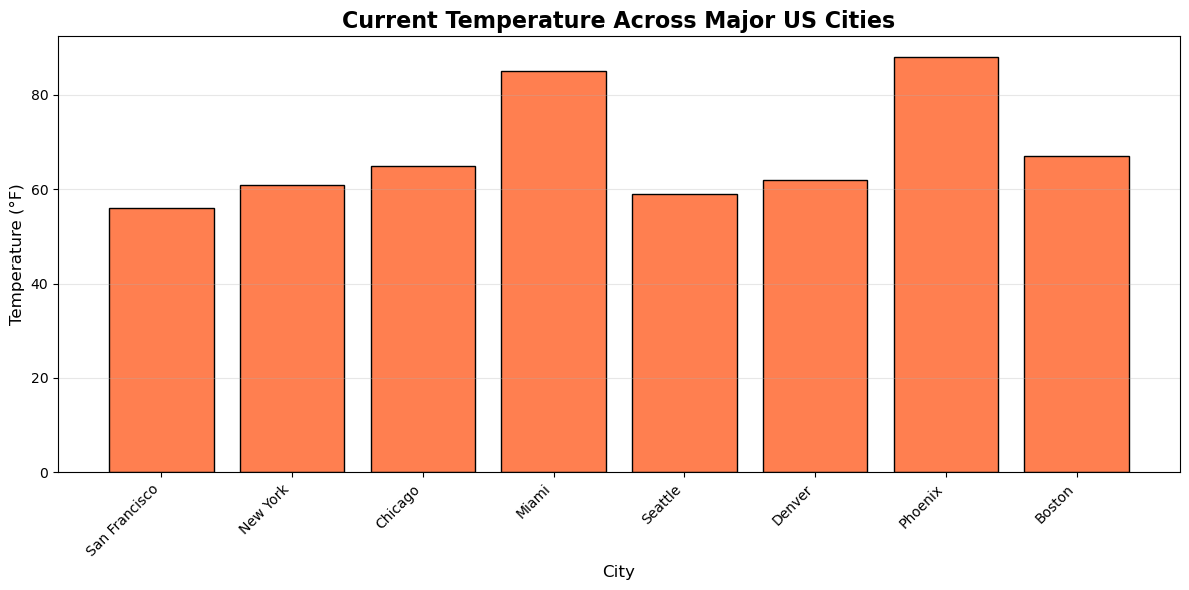


Getting 7-day forecast for San Francisco...
             Period  Temperature                            Conditions
0         Overnight           56                                 Clear
1            Monday           78                                 Sunny
2      Monday Night           58                          Mostly Clear
3           Tuesday           75                                 Sunny
4     Tuesday Night           57                         Partly Cloudy
5         Wednesday           67                          Partly Sunny
6   Wednesday Night           56                         Partly Cloudy
7          Thursday           68                          Mostly Sunny
8    Thursday Night           56                         Partly Cloudy
9            Friday           68  Mostly Cloudy then Chance Light Rain
10     Friday Night           57                     Chance Light Rain
11         Saturday           67                     Chance Light Rain
12   Saturday Night           57

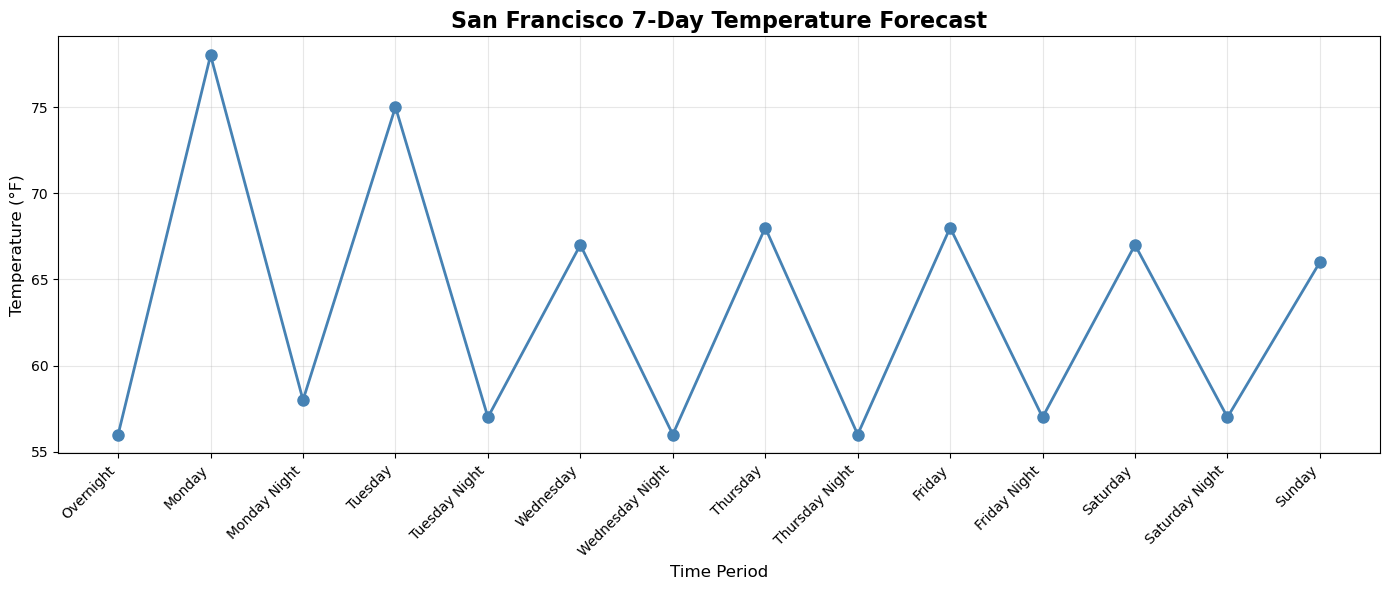

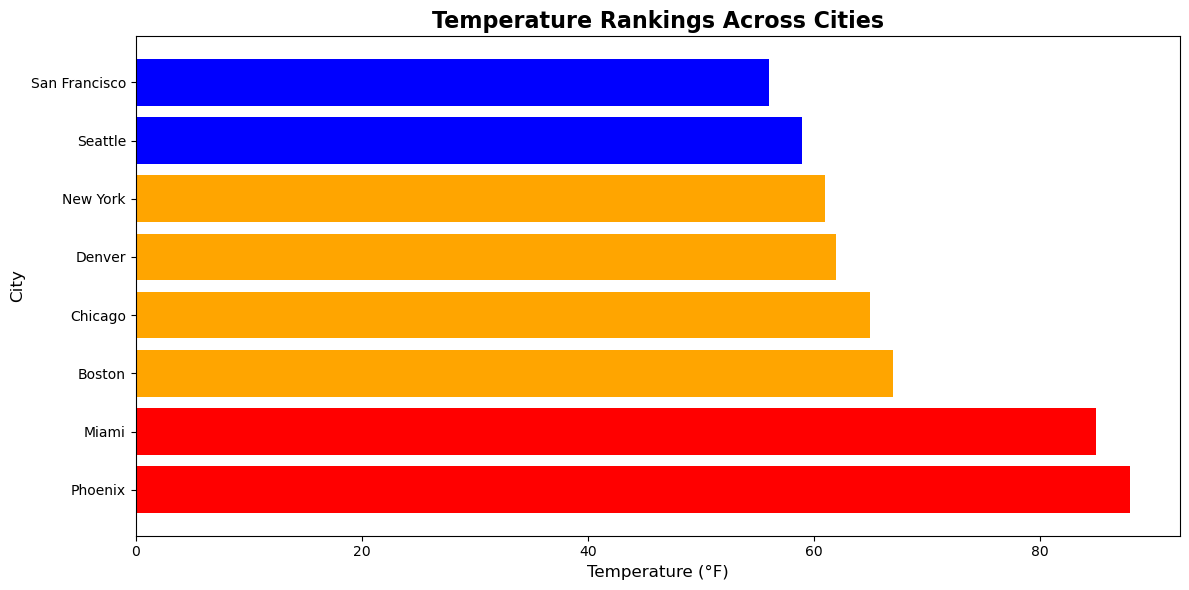


Weather data saved to weather_data.csv

Scraped 100 quotes!
                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                           tags  quote_length  
0        change, deep-thoughts, thinking, world           115  
1                            abilities, choices            85  
2  inspirational, life, live, miracle, miracles           131  
3              aliteracy, books, classic, humor           104  
4                    be-yourself, inspirational           111  


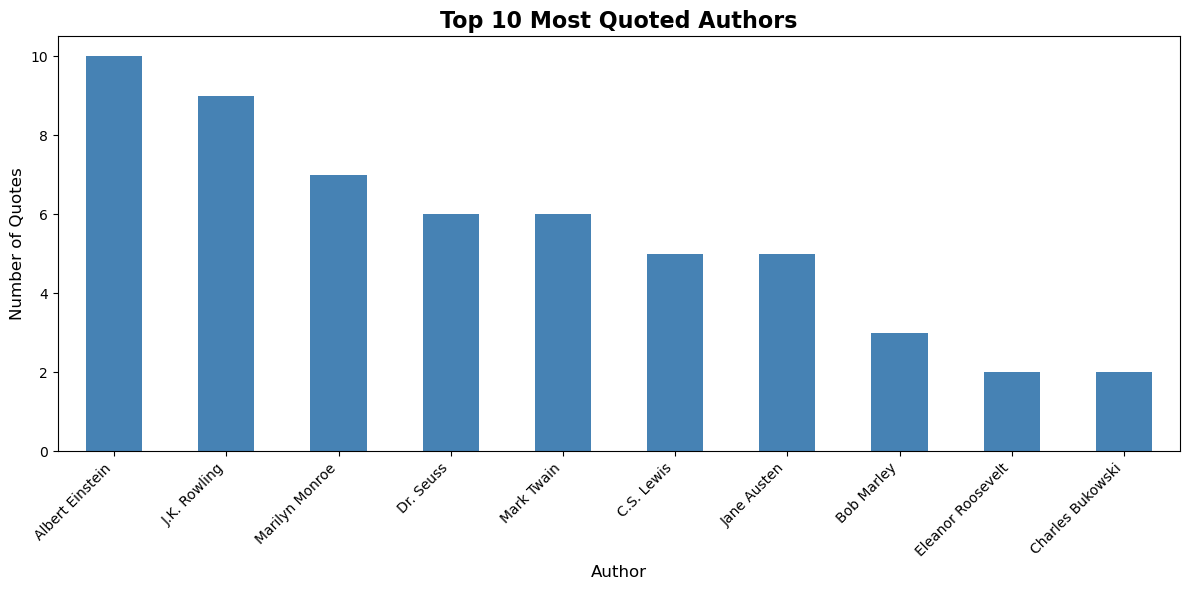

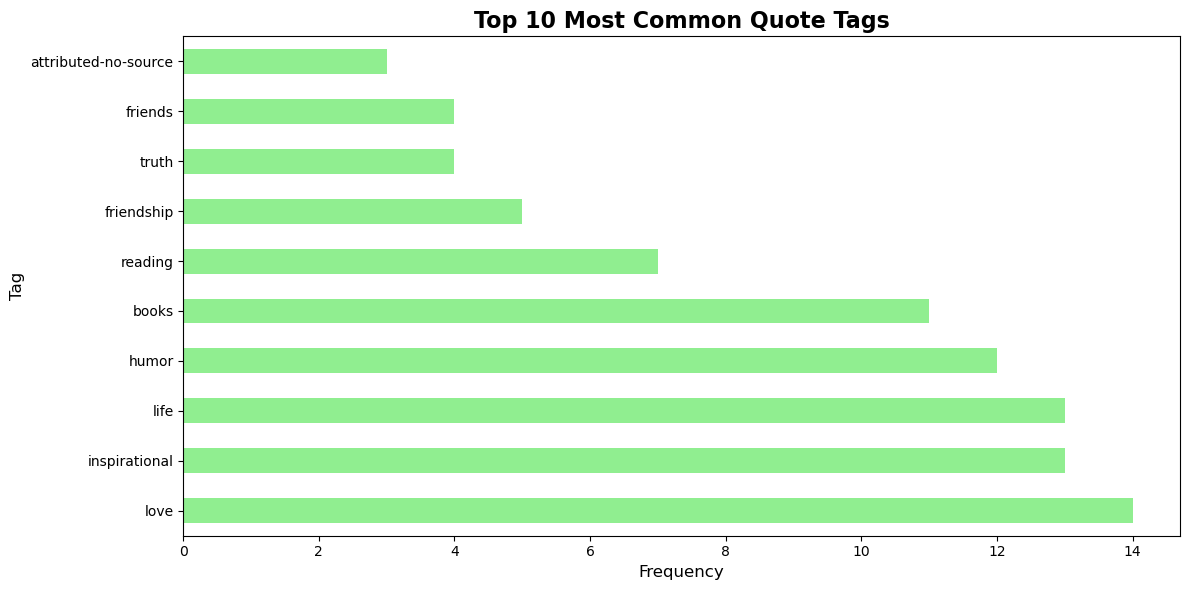


Quotes data saved to quotes_data.csv

=== ALL DATA COLLECTION AND VISUALIZATION COMPLETE ===


In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# ========== WEATHER DATA SCRAPING ==========

# Major US cities with their lat/lon coordinates
cities = {
    'San Francisco': (37.7749, -122.4194),
    'New York': (40.7128, -74.0060),
    'Chicago': (41.8781, -87.6298),
    'Miami': (25.7617, -80.1918),
    'Seattle': (47.6062, -122.3321),
    'Denver': (39.7392, -104.9903),
    'Phoenix': (33.4484, -112.0740),
    'Boston': (42.3601, -71.0589)
}

# Function to get weather forecast
def get_weather_forecast(city_name, lat, lon):
    try:
        # Get grid point
        points_url = f"https://api.weather.gov/points/{lat},{lon}"
        response = requests.get(points_url, headers={'User-Agent': 'Weather Study (student project)'})
        data = response.json()
        
        # Get forecast
        forecast_url = data['properties']['forecast']
        forecast_response = requests.get(forecast_url, headers={'User-Agent': 'Weather Study (student project)'})
        forecast_data = forecast_response.json()
        
        return forecast_data['properties']['periods']
    except Exception as e:
        print(f"Error getting weather for {city_name}: {e}")
        return None

# Collect weather data
weather_data = []

for city, (lat, lon) in cities.items():
    print(f"Getting weather for {city}...")
    forecast = get_weather_forecast(city, lat, lon)
    
    if forecast:
        # Get current conditions (first period)
        current = forecast[0]
        weather_data.append({
            'City': city,
            'Temperature': current['temperature'],
            'Conditions': current['shortForecast'],
            'Wind Speed': current['windSpeed'],
            'Period': current['name']
        })

# Create DataFrame
weather_df = pd.DataFrame(weather_data)
print("\nWeather Data:")
print(weather_df)

# GRAPH 1: Current Temperature by City
plt.figure(figsize=(12, 6))
plt.bar(weather_df['City'], weather_df['Temperature'], color='coral', edgecolor='black')
plt.title('Current Temperature Across Major US Cities', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Get detailed forecast for one city (7-day)
print("\nGetting 7-day forecast for San Francisco...")
forecast_sf = get_weather_forecast('San Francisco', 37.7749, -122.4194)

if forecast_sf:
    forecast_df = pd.DataFrame([{
        'Period': p['name'],
        'Temperature': p['temperature'],
        'Conditions': p['shortForecast']
    } for p in forecast_sf[:14]])  # 14 periods = 7 days (day+night)
    
    print(forecast_df)
    
    # GRAPH 2: 7-Day Temperature Forecast
    plt.figure(figsize=(14, 6))
    plt.plot(forecast_df['Period'], forecast_df['Temperature'], 
             marker='o', linewidth=2, markersize=8, color='steelblue')
    plt.title('San Francisco 7-Day Temperature Forecast', fontsize=16, fontweight='bold')
    plt.xlabel('Time Period', fontsize=12)
    plt.ylabel('Temperature (°F)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# GRAPH 3: Temperature Comparison (sorted)
plt.figure(figsize=(12, 6))
weather_df_sorted = weather_df.sort_values('Temperature', ascending=False)
colors = ['red' if t > 70 else 'orange' if t > 60 else 'blue' for t in weather_df_sorted['Temperature']]
plt.barh(weather_df_sorted['City'], weather_df_sorted['Temperature'], color=colors)
plt.title('Temperature Rankings Across Cities', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

# Save weather data
weather_df.to_csv('weather_data.csv', index=False)
print("\nWeather data saved to weather_data.csv")


# ========== QUOTES DATA SCRAPING ==========

# Function to scrape quotes
def scrape_all_quotes():
    all_quotes = []
    
    for page in range(1, 11):  # 10 pages
        url = f"https://quotes.toscrape.com/page/{page}/"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        quotes = soup.find_all('div', class_='quote')
        
        for quote in quotes:
            text = quote.find('span', class_='text').text
            author = quote.find('small', class_='author').text
            tags = [tag.text for tag in quote.find_all('a', class_='tag')]
            
            all_quotes.append({
                'quote': text,
                'author': author,
                'tags': ', '.join(tags),
                'quote_length': len(text)
            })
    
    return pd.DataFrame(all_quotes)

# Scrape the quotes data
quotes_df = scrape_all_quotes()
print(f"\nScraped {len(quotes_df)} quotes!")
print(quotes_df.head())

# GRAPH 4: Top 10 Most Quoted Authors
author_counts = quotes_df['author'].value_counts().head(10)

plt.figure(figsize=(12, 6))
author_counts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Quoted Authors', fontsize=16, fontweight='bold')
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Quotes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# GRAPH 5: Most Common Tags
all_tags = quotes_df['tags'].str.split(', ').explode()
tag_counts = all_tags.value_counts().head(10)

plt.figure(figsize=(12, 6))
tag_counts.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Most Common Quote Tags', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Tag', fontsize=12)
plt.tight_layout()
plt.show()

# Save quotes data
quotes_df.to_csv('quotes_data.csv', index=False)
print("\nQuotes data saved to quotes_data.csv")

print("\n=== ALL DATA COLLECTION AND VISUALIZATION COMPLETE ===")

In [67]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import json
import pandas as pd
import glob

# Change this to YOUR folder path in Google Drive
# To find the path: Open the folder in Drive, right-click, copy the folder name
json_path = '/content/drive/MyDrive/dataverse_files/*.json'

# Find all JSON files
json_files = glob.glob(json_path)
print(f"Found {len(json_files)} files")

all_speeches = []

for json_file in json_files:
    print(f"Processing {json_file}...")
    
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Process speeches
    for speech in data.get('speeches', []):
        speech_row = {
            'bioguide': data.get('bioguide'),
            'display_name': data.get('display_name'),
            'first_name': data.get('name', {}).get('first'),
            'last_name': data.get('name', {}).get('last'),
            'date': speech.get('date'),
            'party': speech.get('party'),
            'chamber': speech.get('chamber'),
            'text': speech.get('text'),
            'speech_id': speech.get('speech_id')
        }
        all_speeches.append(speech_row)

# Create DataFrame
df = pd.DataFrame(all_speeches)

print(f"\nTotal speeches: {len(df)}")
print(df.head())

# Save CSV back to Google Drive
df.to_csv('/content/drive/MyDrive/all_speeches.csv', index=False)
print("\nSaved to Google Drive: all_speeches.csv")

ModuleNotFoundError: No module named 'google.colab'

In [68]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [74]:
import gdown
import json
import pandas as pd
import glob

# Put the folder ID in QUOTES!
folder_id = '10iMpl4VLD19SwM4Jqcq_SnvOZay4-hG1'

# Download the entire folder
print("Downloading folder from Google Drive...")
url = f'https://drive.google.com/drive/folders/{folder_id}'

gdown.download_folder(url, quiet=False, use_cookies=False)

# Find all JSON files in the downloaded folder
json_files = glob.glob('**/*.json', recursive=True)
print(f"\nFound {len(json_files)} JSON files")

all_speeches = []

for json_file in json_files:
    print(f"Processing {json_file}...")
    
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Process speeches
        for speech in data.get('speeches', []):
            speech_row = {
                'bioguide': data.get('bioguide'),
                'display_name': data.get('display_name'),
                'first_name': data.get('name', {}).get('first'),
                'last_name': data.get('name', {}).get('last'),
                'date': speech.get('date'),
                'party': speech.get('party'),
                'chamber': speech.get('chamber'),
                'text': speech.get('text'),
                'speech_id': speech.get('speech_id')
            }
            all_speeches.append(speech_row)
    
    except Exception as e:
        print(f"  Error: {e}")

# Create DataFrame
df = pd.DataFrame(all_speeches)

print(f"\n{'='*50}")
print(f"Total speeches: {len(df)}")
print(f"Unique speakers: {df['display_name'].nunique()}")
print(f"{'='*50}")

# Save to CSV
df.to_csv('all_speeches.csv', index=False)
print("\n✅ Saved to all_speeches.csv")
print(df.head())

Retrieving folder contents


JSONDecodeError: Expecting value: line 1 column 1 (char 0)